# Install Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Load Dependencies

In [2]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Dataset Acquisition

## Install the ucimlrepo Package 

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Import the Dataset 

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [5]:
car_evaluation

{'data': {'ids': None,
  'features':      buying  maint  doors persons lug_boot safety
  0     vhigh  vhigh      2       2    small    low
  1     vhigh  vhigh      2       2    small    med
  2     vhigh  vhigh      2       2    small   high
  3     vhigh  vhigh      2       2      med    low
  4     vhigh  vhigh      2       2      med    med
  ...     ...    ...    ...     ...      ...    ...
  1723    low    low  5more    more      med    med
  1724    low    low  5more    more      med   high
  1725    low    low  5more    more      big    low
  1726    low    low  5more    more      big    med
  1727    low    low  5more    more      big   high
  
  [1728 rows x 6 columns],
  'targets':       class
  0     unacc
  1     unacc
  2     unacc
  3     unacc
  4     unacc
  ...     ...
  1723   good
  1724  vgood
  1725  unacc
  1726   good
  1727  vgood
  
  [1728 rows x 1 columns],
  'original':      buying  maint  doors persons lug_boot safety  class
  0     vhigh  vhigh      2    

In [6]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [7]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


## Merge Dataframe

In [8]:
import pandas as pd

# Merge X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(df.head())


Merged DataFrame:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [9]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Assign Value to Class Label

In [10]:
# Define the ranking/order of the class categories (worst to best)
ordered_classes = ['unacc', 'acc', 'good', 'vgood']

# Convert 'class' column to a categorical type with the specified order
df['class'] = pd.Categorical(df['class'], categories=ordered_classes, ordered=True)

# Define the mapping from class categories to numeric values
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

# Apply the mapping to the 'class' column
df['class_encoded'] = df['class'].map(class_mapping)

# Ensure dtype is int
df['class_encoded'] = df['class_encoded'].astype(int)

# Check the result
print(df)
df

     buying  maint  doors persons lug_boot safety  class  class_encoded
0     vhigh  vhigh      2       2    small    low  unacc              0
1     vhigh  vhigh      2       2    small    med  unacc              0
2     vhigh  vhigh      2       2    small   high  unacc              0
3     vhigh  vhigh      2       2      med    low  unacc              0
4     vhigh  vhigh      2       2      med    med  unacc              0
...     ...    ...    ...     ...      ...    ...    ...            ...
1723    low    low  5more    more      med    med   good              2
1724    low    low  5more    more      med   high  vgood              3
1725    low    low  5more    more      big    low  unacc              0
1726    low    low  5more    more      big    med   good              2
1727    low    low  5more    more      big   high  vgood              3

[1728 rows x 8 columns]


,buying,maint,doors,persons,lug_boot,safety,class,class_encoded
0,vhigh,vhigh,2,2,small,low,unacc,0
1,vhigh,vhigh,2,2,small,med,unacc,0
2,vhigh,vhigh,2,2,small,high,unacc,0
3,vhigh,vhigh,2,2,med,low,unacc,0
4,vhigh,vhigh,2,2,med,med,unacc,0
...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,2
1724,low,low,5more,more,med,high,vgood,3
1725,low,low,5more,more,big,low,unacc,0
1726,low,low,5more,more,big,med,good,2


In [11]:
# Drop the original 'class' column
df = df.drop(columns=['class'])
df

,buying,maint,doors,persons,lug_boot,safety,class_encoded
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,2
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,2


# Glimpse of Dataset

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_encoded
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [13]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_encoded
1723,low,low,5more,more,med,med,2
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,2
1727,low,low,5more,more,big,high,3


# Data Cleaning

## Checking for Missing Values

In [14]:
df.isnull()

,buying,maint,doors,persons,lug_boot,safety,class_encoded
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


In [15]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
Empty DataFrame
Columns: []
Index: []


## Checking for Duplicated Values

In [16]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


## Assign Ranking Values to Categorical Data

In [17]:
# Define the order for each column
category_mappings = {
    "buying": {"vhigh": 3, "high": 2, "med": 1, "low": 0},
    "maint": {"vhigh": 3, "high": 2, "med": 1, "low": 0},
    "lug_boot": {"small": 0, "med": 1, "big": 2},
    "safety": {"low": 0, "med": 1, "high": 2}
}

# Apply the mapping to the DataFrame
for column, mapping in category_mappings.items():
    df[column] = df[column].map(mapping)

# Display the result
print("Label Encoded DataFrame:")
df

Label Encoded DataFrame:


,buying,maint,doors,persons,lug_boot,safety,class_encoded
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5more,more,1,1,2
1724,0,0,5more,more,1,2,3
1725,0,0,5more,more,2,0,0
1726,0,0,5more,more,2,1,2


## Checking for Unique Values in Each Feature Column

In [18]:
# Check unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'buying': [3 2 1 0]
Unique values in column 'maint': [3 2 1 0]
Unique values in column 'doors': ['2' '3' '4' '5more']
Unique values in column 'persons': ['2' '4' 'more']
Unique values in column 'lug_boot': [0 1 2]
Unique values in column 'safety': [0 1 2]
Unique values in column 'class_encoded': [0 1 3 2]


## Bucketing >4 in "persons" and "doors" into Single Value

In [19]:
# Bucketing >4 in "doors" and "persons"
df['doors'] = df['doors'].replace({'5more': '5'})
df['persons'] = df['persons'].replace({'more': '5'})

# Convert the 'doors' and 'persons' columns to numerical (int)
df['doors'] = df['doors'].astype(int)
df['persons'] = df['persons'].astype(int)

# Display the updated DataFrame
print("After Bucketing and Conversion to Numeric:")
print(df)
df

After Bucketing and Conversion to Numeric:
      buying  maint  doors  persons  lug_boot  safety  class_encoded
0          3      3      2        2         0       0              0
1          3      3      2        2         0       1              0
2          3      3      2        2         0       2              0
3          3      3      2        2         1       0              0
4          3      3      2        2         1       1              0
...      ...    ...    ...      ...       ...     ...            ...
1723       0      0      5        5         1       1              2
1724       0      0      5        5         1       2              3
1725       0      0      5        5         2       0              0
1726       0      0      5        5         2       1              2
1727       0      0      5        5         2       2              3

[1728 rows x 7 columns]


,buying,maint,doors,persons,lug_boot,safety,class_encoded
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


## Check the Data Types

In [20]:
print(df.dtypes)

buying           int64
maint            int64
doors            int32
persons          int32
lug_boot         int64
safety           int64
class_encoded    int32
dtype: object


# Descriptive Statistical Analysis

## Measuring Central Tendency

In [21]:
# Select column
columns_to_analyze = df.columns[0:6] 

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0] 

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
buying      1.500000
maint       1.500000
doors       3.500000
persons     3.666667
lug_boot    1.000000
safety      1.000000
dtype: float64

Median values for features:
buying      1.5
maint       1.5
doors       3.5
persons     4.0
lug_boot    1.0
safety      1.0
dtype: float64

Mode values for features:
buying      0.0
maint       0.0
doors       2.0
persons     2.0
lug_boot    0.0
safety      0.0
Name: 0, dtype: float64


## Measures of Variability

In [22]:
# Select column
columns_to_analyze = df.columns[0:6] 

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[columns_to_analyze].std()
variance_values = df[columns_to_analyze].var()
range_values = df[columns_to_analyze].max() - df[columns_to_analyze].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
buying      1.118358
maint       1.118358
doors       1.118358
persons     1.247580
lug_boot    0.816733
safety      0.816733
dtype: float64

Variance values for numerical features:
buying      1.250724
maint       1.250724
doors       1.250724
persons     1.556456
lug_boot    0.667053
safety      0.667053
dtype: float64

Range values for numerical features:
buying      3
maint       3
doors       3
persons     3
lug_boot    2
safety      2
dtype: int64


# Distribution of Features 

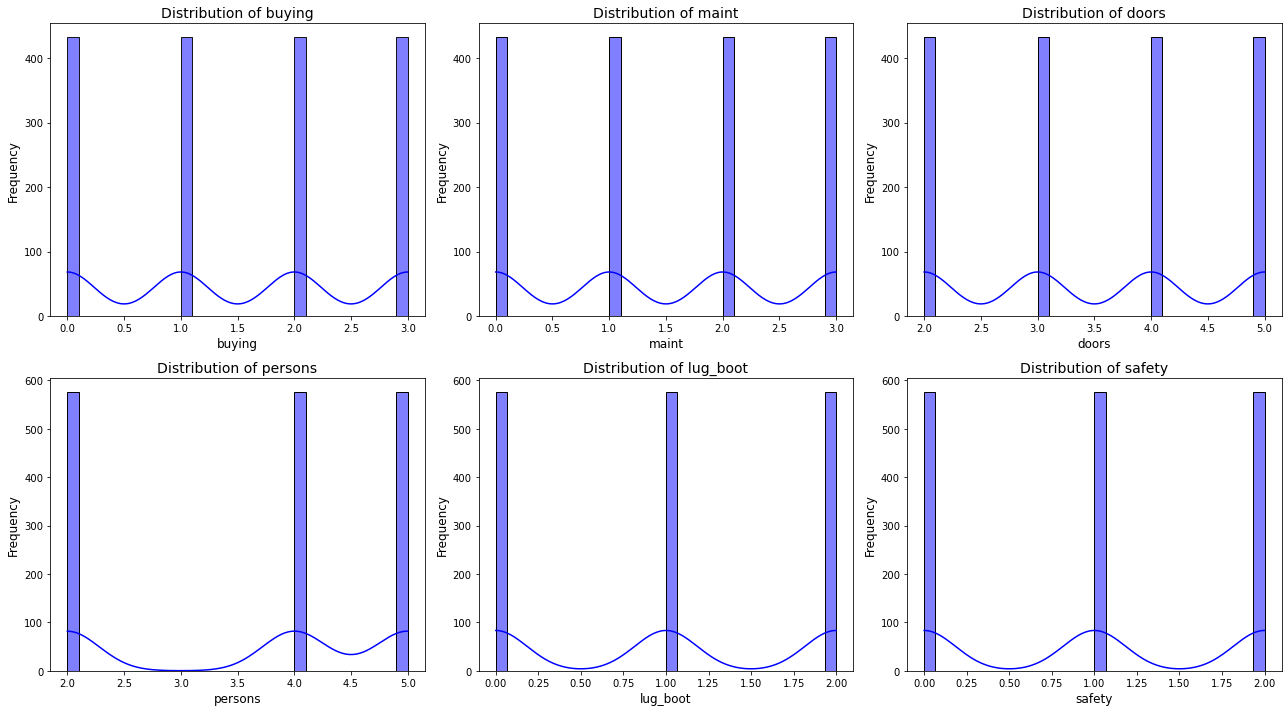

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[6]])  

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)
    
    plt.figure(figsize=(cols_per_row * 6, num_rows * 5)) 
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)


# Checking for Outliers

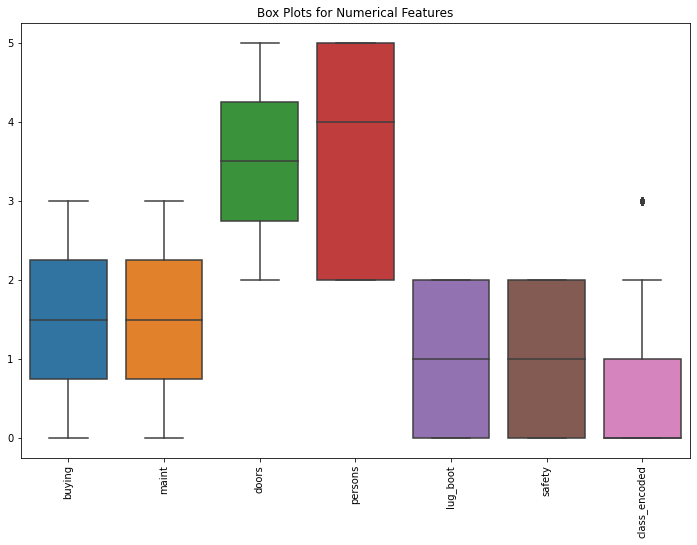

In [24]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

# Correlation Matrix 

## Correlation Matrix

In [25]:
correlation_matrix = df.corr("pearson")
correlation_matrix

,buying,maint,doors,persons,lug_boot,safety,class_encoded
buying,1.000000e+00,-1.356939e-15,4.191709e-15,7.886258e-16,-1.045866e-16,-4.082114e-16,-0.282750
maint,-1.356939e-15,1.000000e+00,7.812681e-16,1.822741e-16,8.544286e-17,-7.826398e-17,-0.232422
doors,4.191709e-15,7.812681e-16,1.000000e+00,-9.989138e-17,-1.632846e-17,2.801175e-17,0.066057
persons,7.886258e-16,1.822741e-16,-9.989138e-17,1.000000e+00,-1.438481e-17,7.570954e-18,0.373459
lug_boot,-1.045866e-16,8.544286e-17,-1.632846e-17,-1.438481e-17,1.000000e+00,1.927471e-18,0.157932
safety,-4.082114e-16,-7.826398e-17,2.801175e-17,7.570954e-18,1.927471e-18,1.000000e+00,0.439337
class_encoded,-2.827504e-01,-2.324215e-01,6.605665e-02,3.734592e-01,1.579317e-01,4.393373e-01,1.000000


## Correlation by Ranking

In [26]:
# Extract the correlation of all features with 'class' column
correlation_with_success = correlation_matrix['class_encoded']

# Print the correlation values
print(correlation_with_success)

buying          -0.282750
maint           -0.232422
doors            0.066057
persons          0.373459
lug_boot         0.157932
safety           0.439337
class_encoded    1.000000
Name: class_encoded, dtype: float64


## Correlation Heatmap

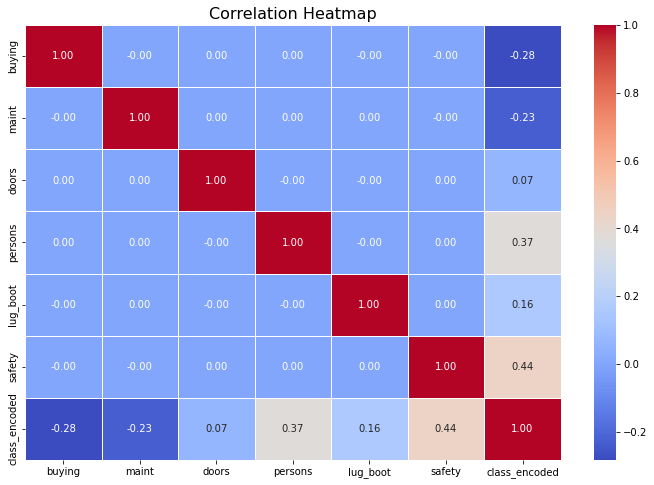

In [27]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Class (Target Label)

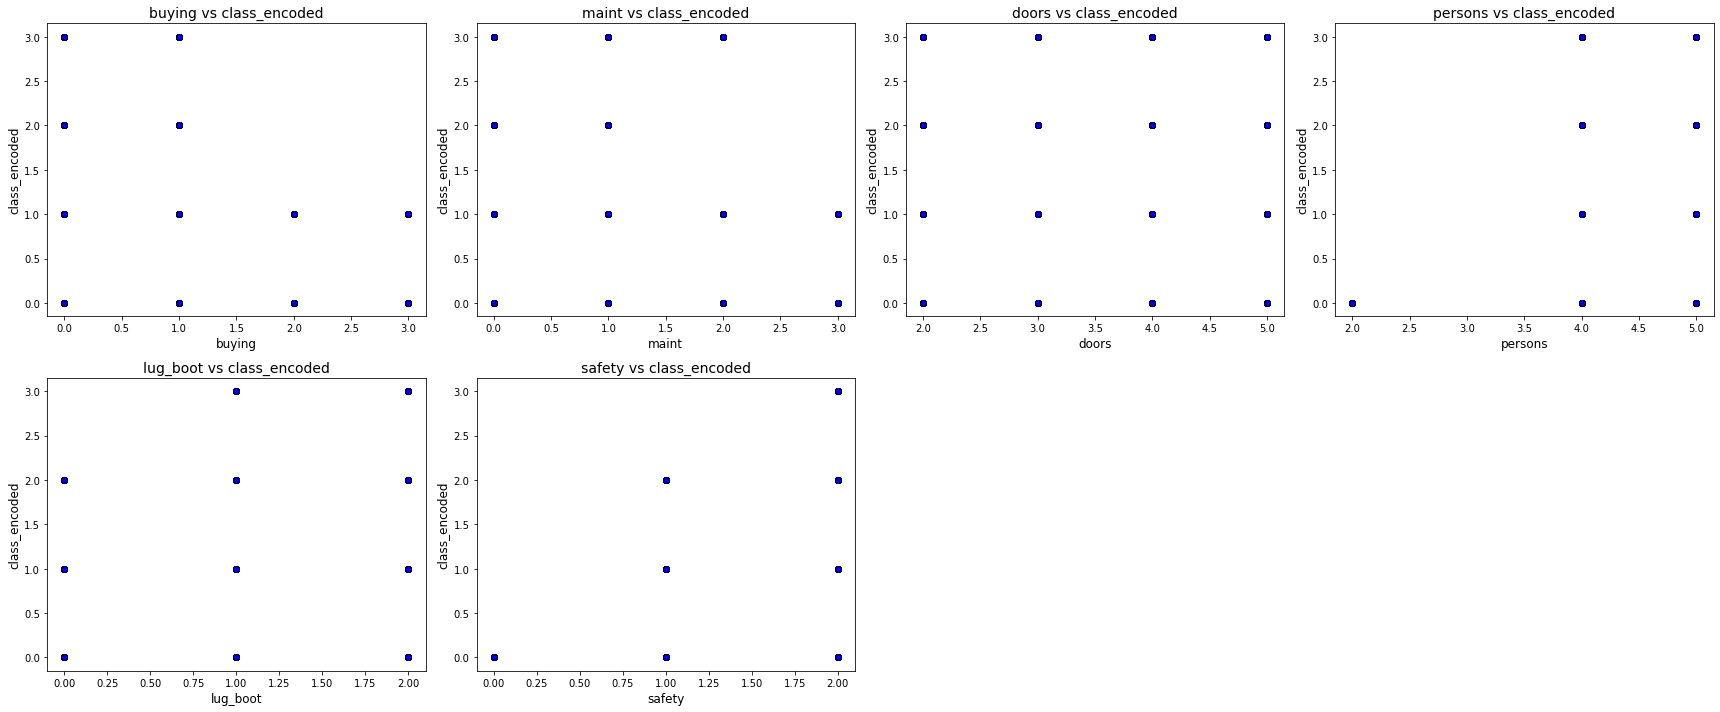

In [28]:
# Define features and target
features = df.columns[:6]  
target = df.columns[6]     

# Function to plot scatter plots for each feature against the target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    num_rows = (num_features // cols_per_row) + int(num_features % cols_per_row > 0)
    
    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))  # Adjust figure size for better readability
    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, cols_per_row, i)
        plt.scatter(df[feature], df[target], alpha=0.7, c='blue', edgecolor='k')
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.tight_layout()
    plt.show()

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)

# Feature Importance

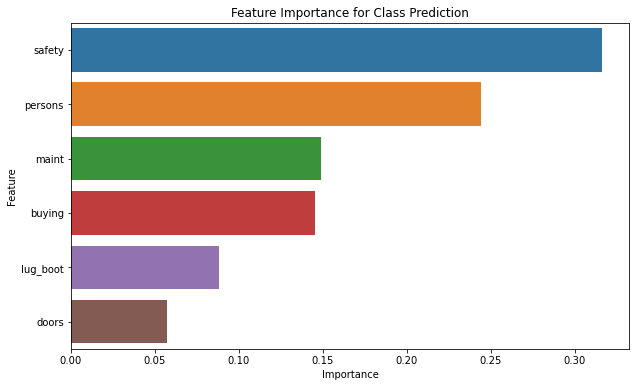

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df.drop(columns=['class_encoded'])
y = df['class_encoded']

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Class Prediction')
plt.show()

# Relationship Between Attributes

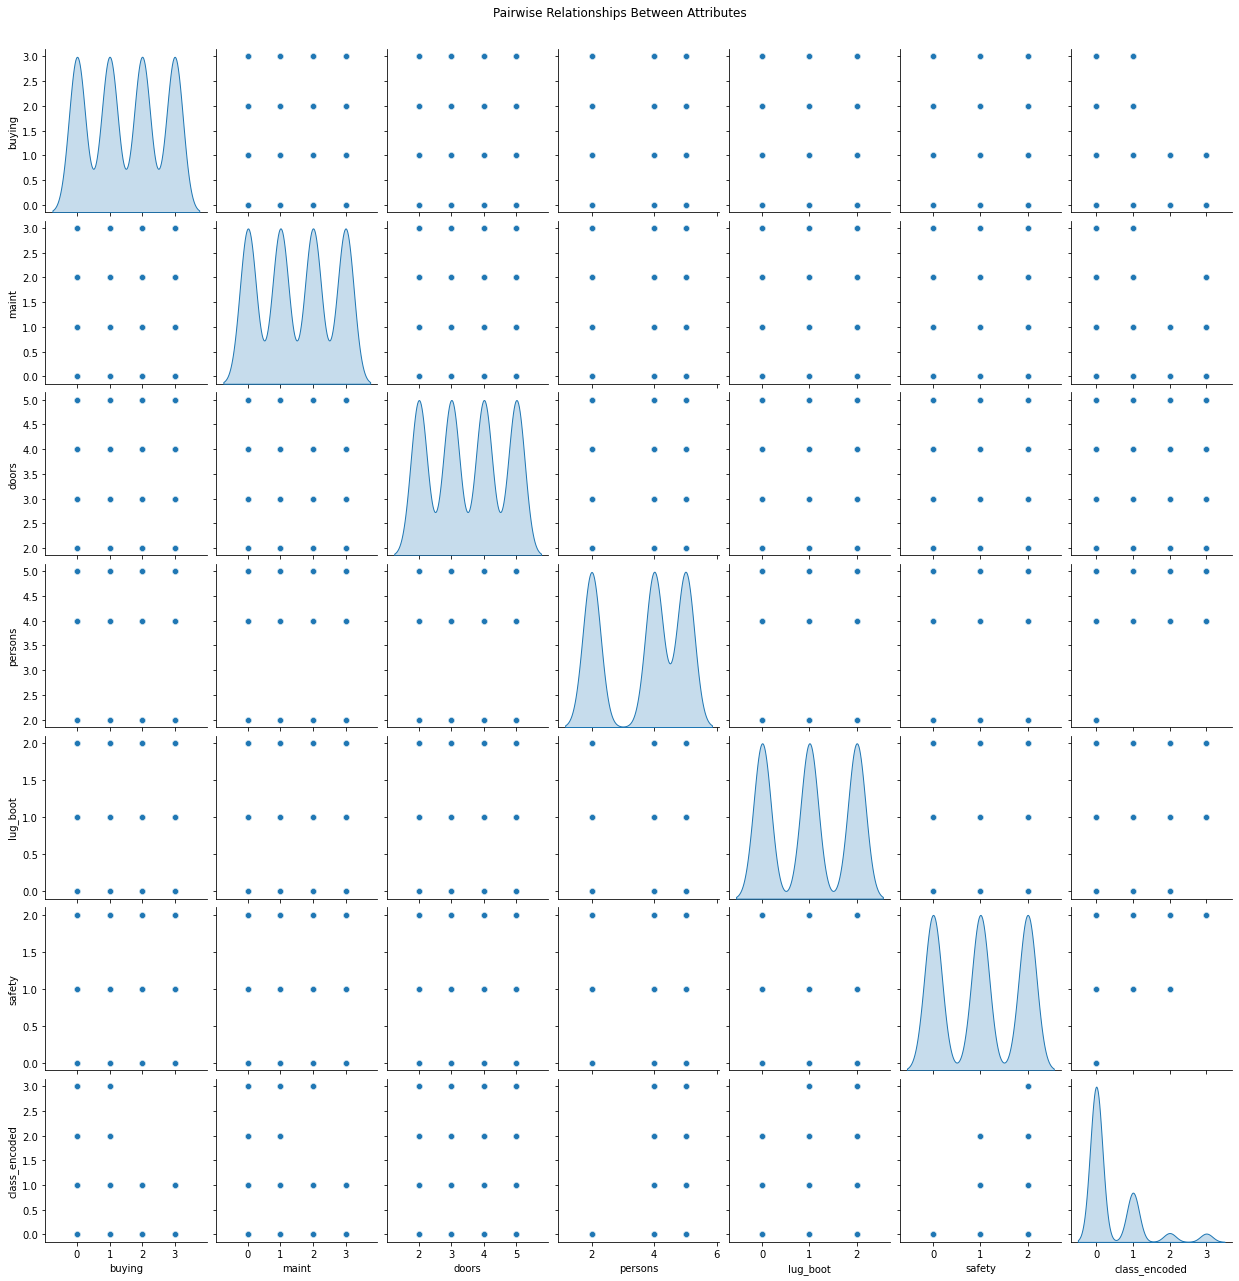

In [30]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")  # Use 'kde' for kernel density estimate on the diagonal
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

# Data Transformation

In [31]:
df

,buying,maint,doors,persons,lug_boot,safety,class_encoded
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [32]:
from sklearn.preprocessing import MinMaxScaler

array = df.values
# separate array into input and output components
X = array[:,0:6]
Y = array[:,6]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#print(X[0:5,:])
print(rescaledX[0:5,:])

[[1.  1.  0.  0.  0.  0. ]
 [1.  1.  0.  0.  0.  0.5]
 [1.  1.  0.  0.  0.  1. ]
 [1.  1.  0.  0.  0.5 0. ]
 [1.  1.  0.  0.  0.5 0.5]]


In [33]:
rescaledX

array([[1. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 1. , 0. , 0. , 0. , 0.5],
       [1. , 1. , 0. , 0. , 0. , 1. ],
       ...,
       [0. , 0. , 1. , 1. , 1. , 0. ],
       [0. , 0. , 1. , 1. , 1. , 0.5],
       [0. , 0. , 1. , 1. , 1. , 1. ]])

# Checking for Data Imbalance

In [34]:
class_dist = df.groupby('class_encoded').size()
print(class_dist)
print()
print("Class 0 = Unacceptable")
print("Class 1 = Acceptable")
print("Class 2 = Good")
print("Class 3 = Very Good")

class_encoded
0    1210
1     384
2      69
3      65
dtype: int64

Class 0 = Unacceptable
Class 1 = Acceptable
Class 2 = Good
Class 3 = Very Good


# Splitting to Train and Test Data 

### Use Min-Max Scaled Data for Training and Test

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

array = df.values

# Extract X (features) and y (target)
X = rescaledX 
y = array[:,6]  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Total Train and Test Data after Splitting

In [36]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 1209
Total test data of X: 519

Total training data of Y: 1209
Total test data of Y: 519


# SMOTE Oversampling for Minority Class

In [37]:
# Convert y_train to a pandas Series for easier manipulation
y_train = pd.Series(y_train)

print('Before Oversampling:')
print(y_train.value_counts())

# Apply SMOTE for oversampling only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert y_train_smote back to a pandas Series to use value_counts()
y_train_smote = pd.Series(y_train_smote)

print('After Oversampling:')
print(y_train_smote.value_counts())

Before Oversampling:
0    847
1    269
2     48
3     45
dtype: int64
After Oversampling:
0    847
3    847
2    847
1    847
dtype: int64


In [38]:
X_train_smote

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.        , 0.33333333, 1.        , 0.5       ,
        1.        ],
       [0.        , 0.        , 1.        , 0.        , 0.5       ,
        1.        ],
       ...,
       [0.33333333, 0.        , 0.66145047, 1.        , 0.5       ,
        1.        ],
       [0.33333333, 0.        , 0.71652688, 0.66666667, 1.        ,
        1.        ],
       [0.33333333, 0.        , 0.51180047, 0.8451338 , 1.        ,
        1.        ]])

In [39]:
y_train_smote

0       0
1       3
2       0
3       0
4       3
       ..
3383    3
3384    3
3385    3
3386    3
3387    3
Length: 3388, dtype: int64

In [40]:
# Check class distribution in the original data
class_dist_original = pd.Series(y).value_counts()
print("Original Class Distribution:")
print(class_dist_original)
print()
print("Class 0 = Unacceptable")
print("Class 1 = Acceptable")
print("Class 2 = Good")
print("Class 3 = Very Good")
print()

# Check class distribution in the training data before SMOTE
class_dist_train_before_smote = pd.Series(y_train).value_counts()
print("Class Distribution in Training Data (Before SMOTE):")
print(class_dist_train_before_smote)
print()
print("Class 0 = Unacceptable")
print("Class 1 = Acceptable")
print("Class 2 = Good")
print("Class 3 = Very Good")
print()

# Check class distribution after applying SMOTE on training data
class_dist_oversampled = y_train_smote.value_counts()
print("Oversampled Class Distribution (Training Data):")
print(class_dist_oversampled)
print()
print("Class 0 = Unacceptable")
print("Class 1 = Acceptable")
print("Class 2 = Good")
print("Class 3 = Very Good")
print()

# Check class distribution in the test data
class_dist_test = pd.Series(y_test).value_counts()
print("Class Distribution in Test Data:")
print(class_dist_test)
print()
print("Class 0 = Unacceptable")
print("Class 1 = Acceptable")
print("Class 2 = Good")
print("Class 3 = Very Good")

Original Class Distribution:
0    1210
1     384
2      69
3      65
dtype: int64

Class 0 = Unacceptable
Class 1 = Acceptable
Class 2 = Good
Class 3 = Very Good

Class Distribution in Training Data (Before SMOTE):
0    847
1    269
2     48
3     45
dtype: int64

Class 0 = Unacceptable
Class 1 = Acceptable
Class 2 = Good
Class 3 = Very Good

Oversampled Class Distribution (Training Data):
0    847
3    847
2    847
1    847
dtype: int64

Class 0 = Unacceptable
Class 1 = Acceptable
Class 2 = Good
Class 3 = Very Good

Class Distribution in Test Data:
0    363
1    115
2     21
3     20
dtype: int64

Class 0 = Unacceptable
Class 1 = Acceptable
Class 2 = Good
Class 3 = Very Good


# Train, Test and Evaluate Models

## Logistic Regression

Accuracy: 78.227%

[[293  40  21   9]
 [ 26  75   6   8]
 [  0   0  20   1]
 [  0   2   0  18]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       363
           1       0.64      0.65      0.65       115
           2       0.43      0.95      0.59        21
           3       0.50      0.90      0.64        20

    accuracy                           0.78       519
   macro avg       0.62      0.83      0.68       519
weighted avg       0.82      0.78      0.79       519



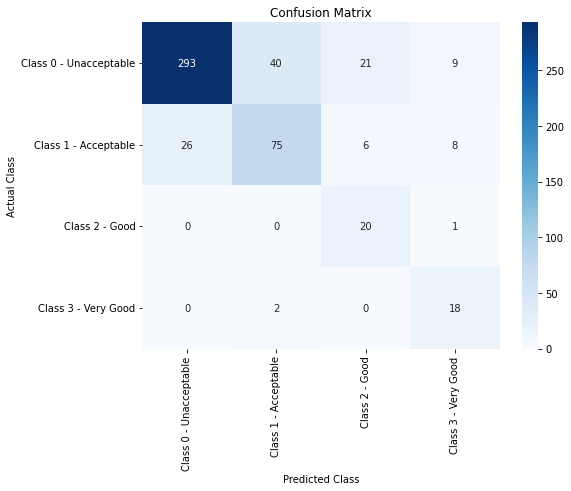

In [41]:
import seaborn as sns

# Model Training
model = LogisticRegression(solver='liblinear')
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"],
            yticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## KNN

Accuracy: 94.798%

[[359   3   1   0]
 [ 12  99   3   1]
 [  0   6  14   1]
 [  0   0   0  20]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.92      0.86      0.89       115
           2       0.78      0.67      0.72        21
           3       0.91      1.00      0.95        20

    accuracy                           0.95       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.95      0.95      0.95       519



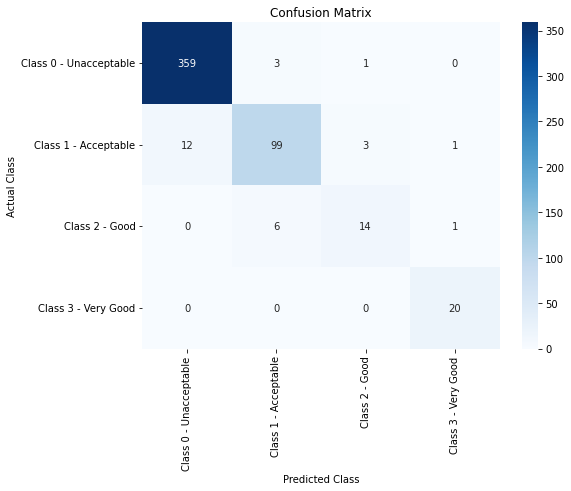

In [42]:
import seaborn as sns

# Model Training
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"],
            yticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Naive Bayes

Accuracy: 71.291%

[[276  65  12  10]
 [  0  63   6  46]
 [  0   0  11  10]
 [  0   0   0  20]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       363
           1       0.49      0.55      0.52       115
           2       0.38      0.52      0.44        21
           3       0.23      1.00      0.38        20

    accuracy                           0.71       519
   macro avg       0.53      0.71      0.55       519
weighted avg       0.83      0.71      0.75       519



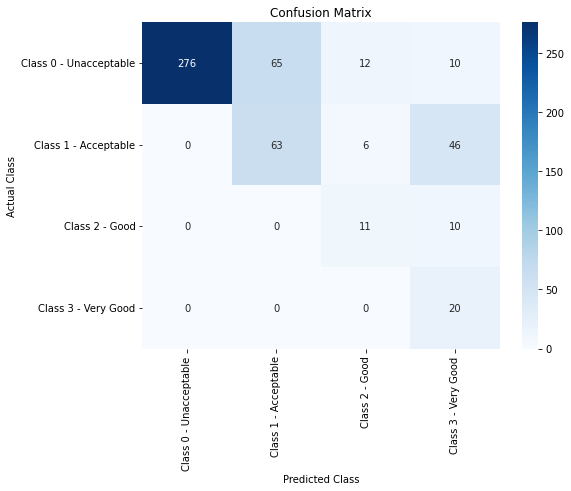

In [43]:
import seaborn as sns

# Model Training
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"],
            yticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Decision Trees 

Accuracy: 96.917%

[[362   0   1   0]
 [  7 107   1   0]
 [  0   4  15   2]
 [  0   1   0  19]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       363
           1       0.96      0.93      0.94       115
           2       0.88      0.71      0.79        21
           3       0.90      0.95      0.93        20

    accuracy                           0.97       519
   macro avg       0.93      0.90      0.91       519
weighted avg       0.97      0.97      0.97       519



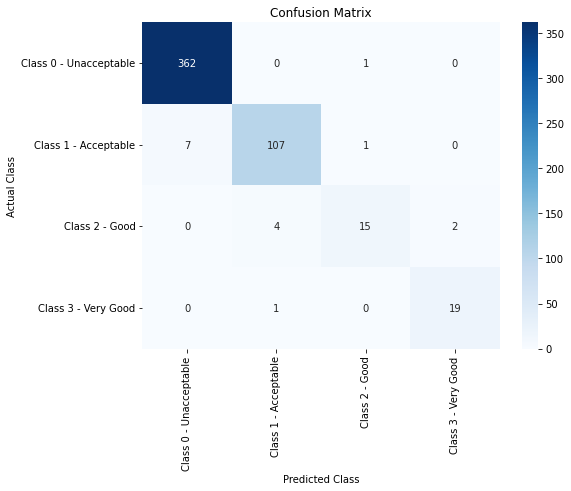

In [44]:
import seaborn as sns

# Model Training
model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"],
            yticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Support Vector Machines

Accuracy: 96.724%

[[348  14   1   0]
 [  0 115   0   0]
 [  0   0  19   2]
 [  0   0   0  20]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       363
           1       0.89      1.00      0.94       115
           2       0.95      0.90      0.93        21
           3       0.91      1.00      0.95        20

    accuracy                           0.97       519
   macro avg       0.94      0.97      0.95       519
weighted avg       0.97      0.97      0.97       519



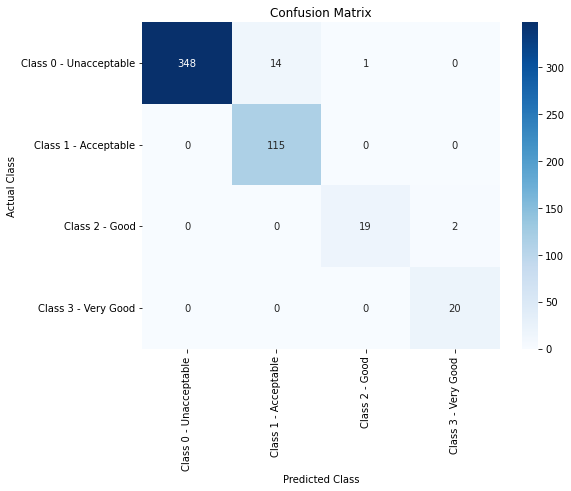

In [45]:
import seaborn as sns

# Model Training
model = SVC()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"],
            yticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## XGBoost

Accuracy: 98.459%

[[363   0   0   0]
 [  3 111   0   1]
 [  0   2  17   2]
 [  0   0   0  20]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       0.98      0.97      0.97       115
           2       1.00      0.81      0.89        21
           3       0.87      1.00      0.93        20

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.99      0.98      0.98       519



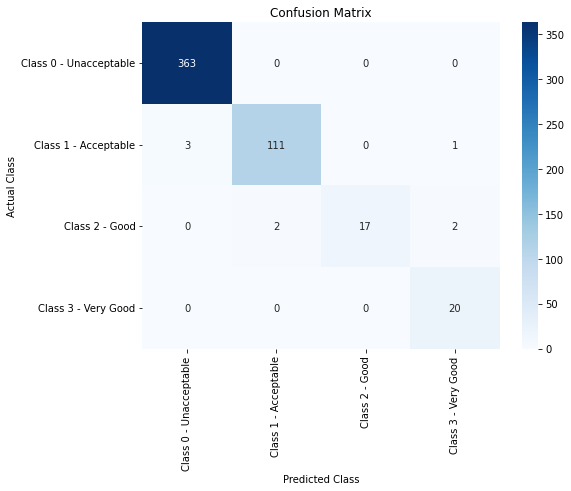

In [46]:

import xgboost as xgb

# Model Training with XGBoost
model = xgb.XGBClassifier(eval_metric='mlogloss')  # Specify eval_metric for multi-class classification
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"],
            yticklabels=['Class 0 - Unacceptable', 'Class 1 - Acceptable', "Class 2 - Good", "Class 3 - Very Good"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


# Compare Machine Learning Algorithms 

LR: Accuracy: 0.782
KNN: Accuracy: 0.933
CART: Accuracy: 0.969
NB: Accuracy: 0.713
SVM: Accuracy: 0.967
XGBoost: Accuracy: 0.985


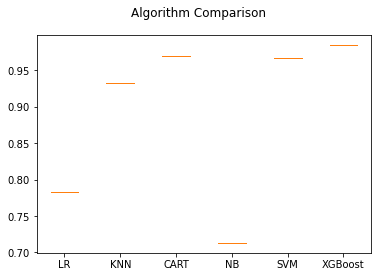

In [47]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'))) 

# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    # Test accuracy
    result = model.score(X_test, y_test)
    results.append([result]) 
    names.append(name)
    print(f"{name}: Accuracy: {result:.3f}")
    

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()